In [11]:
%pylab inline
import pandas as pd
import mca


Populating the interactive namespace from numpy and matplotlib


In [12]:
data = pd.read_table('./cookieclassifier_data_matrix.tsv',
                     sep='\t', header=0)

In [13]:
data.columns = ['category'] + data.columns.tolist()[1:]

In [14]:
data['category'] = data.category.astype('category')
data['category'] = data.category.cat.rename_categories([1,2,3])

In [15]:
data#
X = data.drop('category', axis=1)

mca_ben = mca.MCA(X)
mca_ind = mca.MCA(X, benzecri=False)

In [16]:
mca_ben

In [18]:
fs, cos, cont = 'Factor score','Squared cosines', 'Contributions x 1000'
table3 = pd.DataFrame(columns=X.index, index=pd.MultiIndex
                      .from_product([[fs, cos, cont], range(1, 3)]))

table3.loc[fs,    :] = mca_ben.fs_r(N=2).T
table3.loc[cos,   :] = mca_ben.cos_r(N=2).T
table3.loc[cont,  :] = mca_ben.cont_r(N=2).T * 1000

In [19]:
table3

0            1           2           3     \
Factor score         1 -0.421929    -0.296647   -0.449088   -0.412061   
                     2 -0.459544   0.00390408   -0.115709    0.056708   
Squared cosines      1  0.108207     0.145579   0.0966167     0.18672   
                     2   0.12836  2.52149e-05  0.00641393  0.00353637   
Contributions x 1000 1  0.339312     0.167726    0.349454    0.235364   
                     2   1.53226   0.00011059   0.0883121   0.0169693   

                             4           5           6          7     \
Factor score         1  -0.479269   -0.350682   -0.504301  -0.498747   
                     2  -0.130495  -0.0765635  -0.0590306  -0.123805   
Squared cosines      1   0.391949    0.120913    0.463594   0.163296   
                     2  0.0290574  0.00576356  0.00635202  0.0100621   
Contributions x 1000 1   0.318401    0.191777    0.396597   0.431009   
                     2  0.0898589   0.0347994   0.0206863   0.101102   

                            8            9        ...             1921  \
Factor score         1 -0.514678    -0.533952     ...          1.10075   
                     2 -0.423026    0.0243784     ...         0.114587   
Squared cosines      1  0.194268     0.444923     ...         0.139675   
                     2   0.13124  0.000927455     ...       0.00151362   
Contributions x 1000 1  0.504883     0.494005     ...          1.67955   
                     2   1.29841    0.0039201     ...        0.0692867   

                              1922        1923        1924        1925  \
Factor score         1    0.777899     1.08087    0.874154    0.989452   
                     2    0.102167     0.14361   0.0416651   0.0646777   
Squared cosines      1    0.115483    0.229065     0.58557    0.367409   
                     2  0.00199203  0.00404374  0.00133029  0.00156989   
Contributions x 1000 1    0.943661     2.22671     1.98607      2.3749   
                     2   0.0619659    0.149639    0.017176   0.0386298   

                               1926        1927         1928        1929  \
Factor score         1     0.985762    0.989452     0.985762    0.597031   
                     2    0.0525748   0.0646777    0.0525748   0.0426535   
Squared cosines      1     0.301467    0.367409     0.301467    0.315981   
                     2  0.000857534  0.00156989  0.000857534  0.00161279   
Contributions x 1000 1      1.01024      2.3749      1.01024    0.185286   
                     2    0.0109394   0.0386298    0.0109394  0.00360012   

                               1930  
Factor score         1     0.617106  
                     2    0.0172379  
Squared cosines      1     0.534713  
                     2  0.000417224  
Contributions x 1000 1     0.329926  
                     2  0.000979994  

[6 rows x 1931 columns]

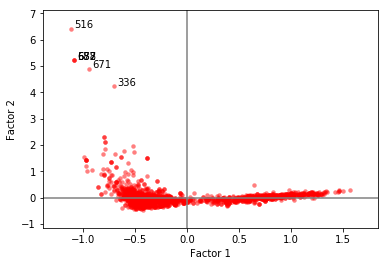

In [28]:
import matplotlib.pyplot as plt

points = table3.loc[fs].values
labels = table3.columns.values
colors = ['#66c2a5', '#fc8d62','#8da0cb']

plt.figure()
plt.margins(0.1)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.scatter(*points, s=20, marker='o', c='r', alpha=.5, linewidths=0)
for label, x, y in zip(labels, *points):
    if y>3:
        plt.annotate(label, xy=(x, y), xytext=(x + .03, y + .03))
plt.show()

In [26]:
table4 = pd.DataFrame(columns=X.columns, index=pd.MultiIndex
                      .from_product([[fs, cos, cont], range(1, 3)]))
table4.loc[fs,  :] = mca_ben.fs_c(N=2).T
table4.loc[cos, :] = mca_ben.cos_c(N=2).T
table4.loc[cont,:] = mca_ben.cont_c(N=2).T * 1000


In [27]:
table4

Italian seasoning Worcestershire sauce   allspice  \
Factor score         1           1.31865              1.08229  -0.500185   
                     2          0.223061           0.00238838  -0.513981   
Squared cosines      1          0.176655             0.125145  0.0781151   
                     2        0.00505495          6.09442e-07  0.0824836   
Contributions x 1000 1           7.23098              2.43554     2.0808   
                     2          0.787672          4.51518e-05    8.36412   

                            almonds   anchovies      anise     apples  \
Factor score         1    -0.549462     1.25571  -0.595048  -0.359006   
                     2    0.0240526    0.104641  -0.307751   -0.41343   
Squared cosines      1     0.180203    0.053564  0.0177813  0.0359906   
                     2  0.000345311  0.00037196  0.0047562    0.04773   
Contributions x 1000 1      8.31763     2.18572   0.797581    1.40692   
                     2    0.0606744   0.0577798   0.812136    7.10282   

                          apricots     arugula       bacon     ...      \
Factor score         1   -0.630577     1.11671      1.1155     ...       
                     2   -0.167947    0.147043    0.161577     ...       
Squared cosines      1   0.0361362    0.177083    0.165842     ...       
                     2  0.00256336  0.00307032  0.00347949     ...       
Contributions x 1000 1     1.79133     6.69836     5.39018     ...       
                     2     0.48373    0.442114    0.430509     ...       

                         tortillas     vanilla      vinegar wafer cookies  \
Factor score         1     1.63448   -0.582597     0.974167      -0.72474   
                     2    0.396923   0.0052275    0.0157832       1.59897   
Squared cosines      1   0.0540342    0.727684     0.370515    0.00920505   
                     2  0.00318654  5.8586e-05  9.72594e-05     0.0448069   
Contributions x 1000 1      2.3145     38.1688      12.6615       1.00112   
                     2    0.519598   0.0116982    0.0126523       18.5507   

                          walnuts       water whipping cream         wine  \
Factor score         1  -0.515376    0.202715      -0.686558      0.71113   
                     2  -0.374316  -0.0623389       0.398752   -0.0460187   
Squared cosines      1  0.0994238    0.104016      0.0137529     0.181779   
                     2  0.0524468  0.00983664     0.00463921  0.000761226   
Contributions x 1000 1    3.58979      3.0119       0.653389      4.81934   
                     2    7.20869     1.08429       0.839036    0.0768275   

                             yeast    zucchini  
Factor score         1    0.702307     1.29419  
                     2    0.020879    0.252668  
Squared cosines      1    0.388619    0.114999  
                     2  0.00034347  0.00438326  
Contributions x 1000 1     17.0927     4.06306  
                     2   0.0575089     0.58954  

[6 rows x 133 columns]